In [2]:
# loading the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [34]:
# reading the file
country = pd.read_csv('C:/Users/Administrator/Desktop/PGDDS/ML/Assignment/Country-data.csv')

In [35]:
country.shape

(167, 10)

In [36]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [37]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [38]:
# checking for any misisng values
country.isnull().sum(axis = 0)/country.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [39]:
# descriptive statistics
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Based on the above descriprive statics it can be seen there are many features with very high range. Some of these are child_mort, exports, imports, income and gdpp. Further analysig these features through visualisations.

## Univariate Analysis

In [319]:
# function to generate boxplots and histograms for features
def univariate_analysis(df_col, col_name):
    
    plt.rcdefaults()
    
    # Histogram
    fig = plt.figure(figsize = (6,3))
    ax1 = fig.add_subplot(121)
    ax1.set(title  = 'Histogram of '+col_name, xlabel = 'bins', ylabel = 'count')
    plt.hist(df_col, bins = 20)
    
    # Boxplot
    ax2 = fig.add_subplot(122)
    ax2.set(title  = 'Boxplot of '+col_name, ylabel = col_name)
    plt.boxplot(df_col)
    plt.tight_layout()
    plt.show()

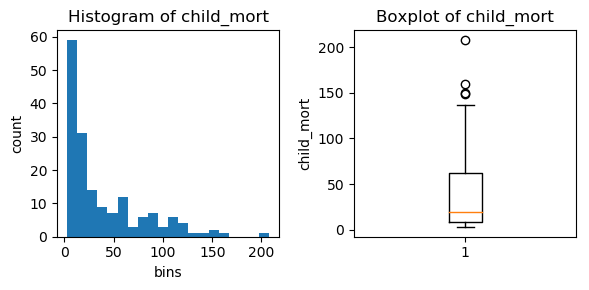

None


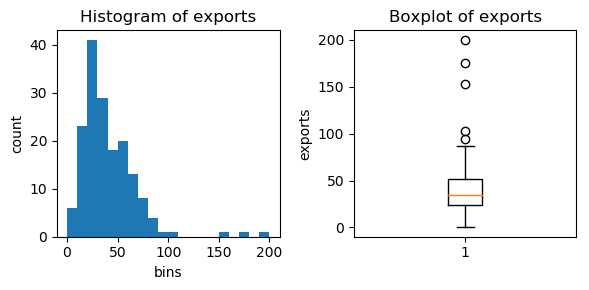

None


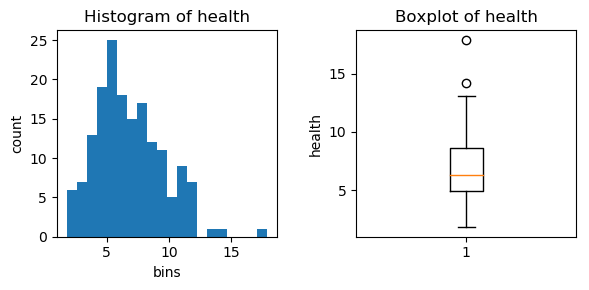

None


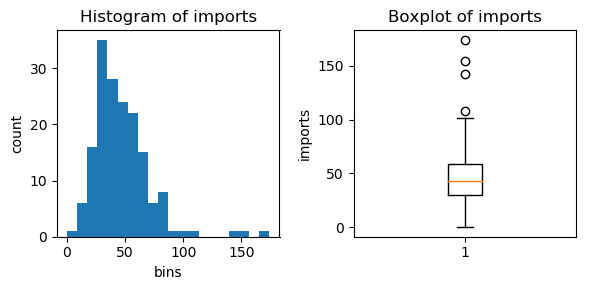

None


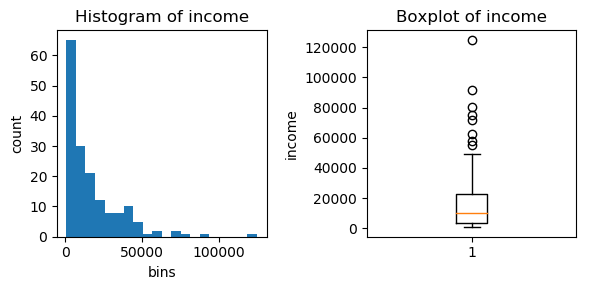

None


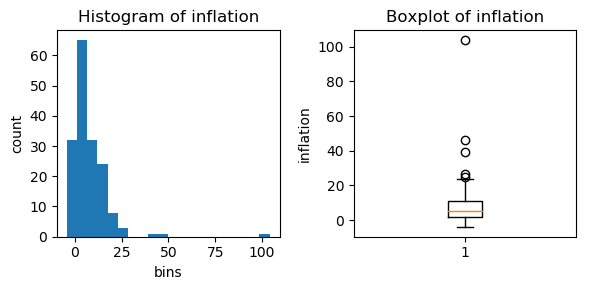

None


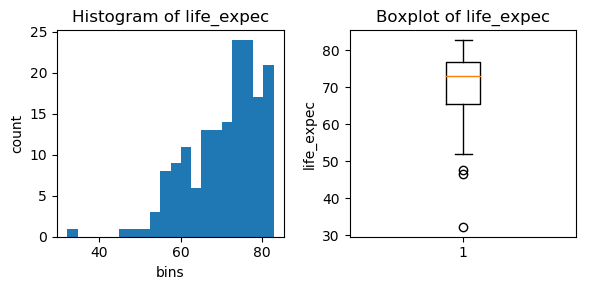

None


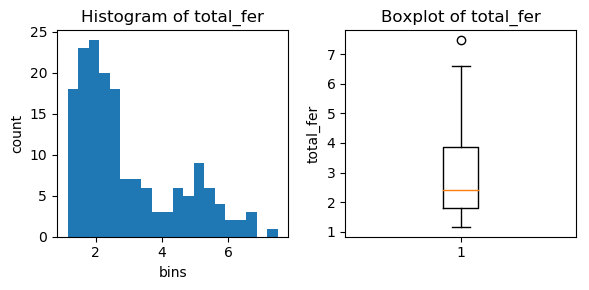

None


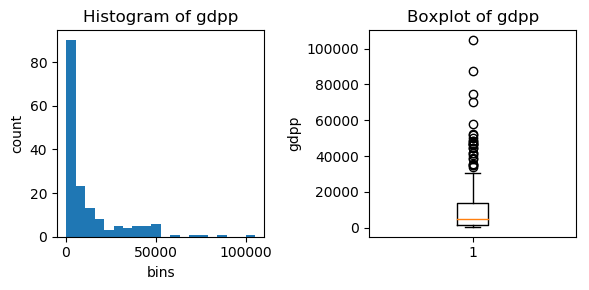

None


In [320]:
# extracting the numeric column names and calling the function
col_list = list(country.columns)
del col_list[0]
for col in col_list:
    print(univariate_analysis(country[col], col))    

## Bivariate Analysis

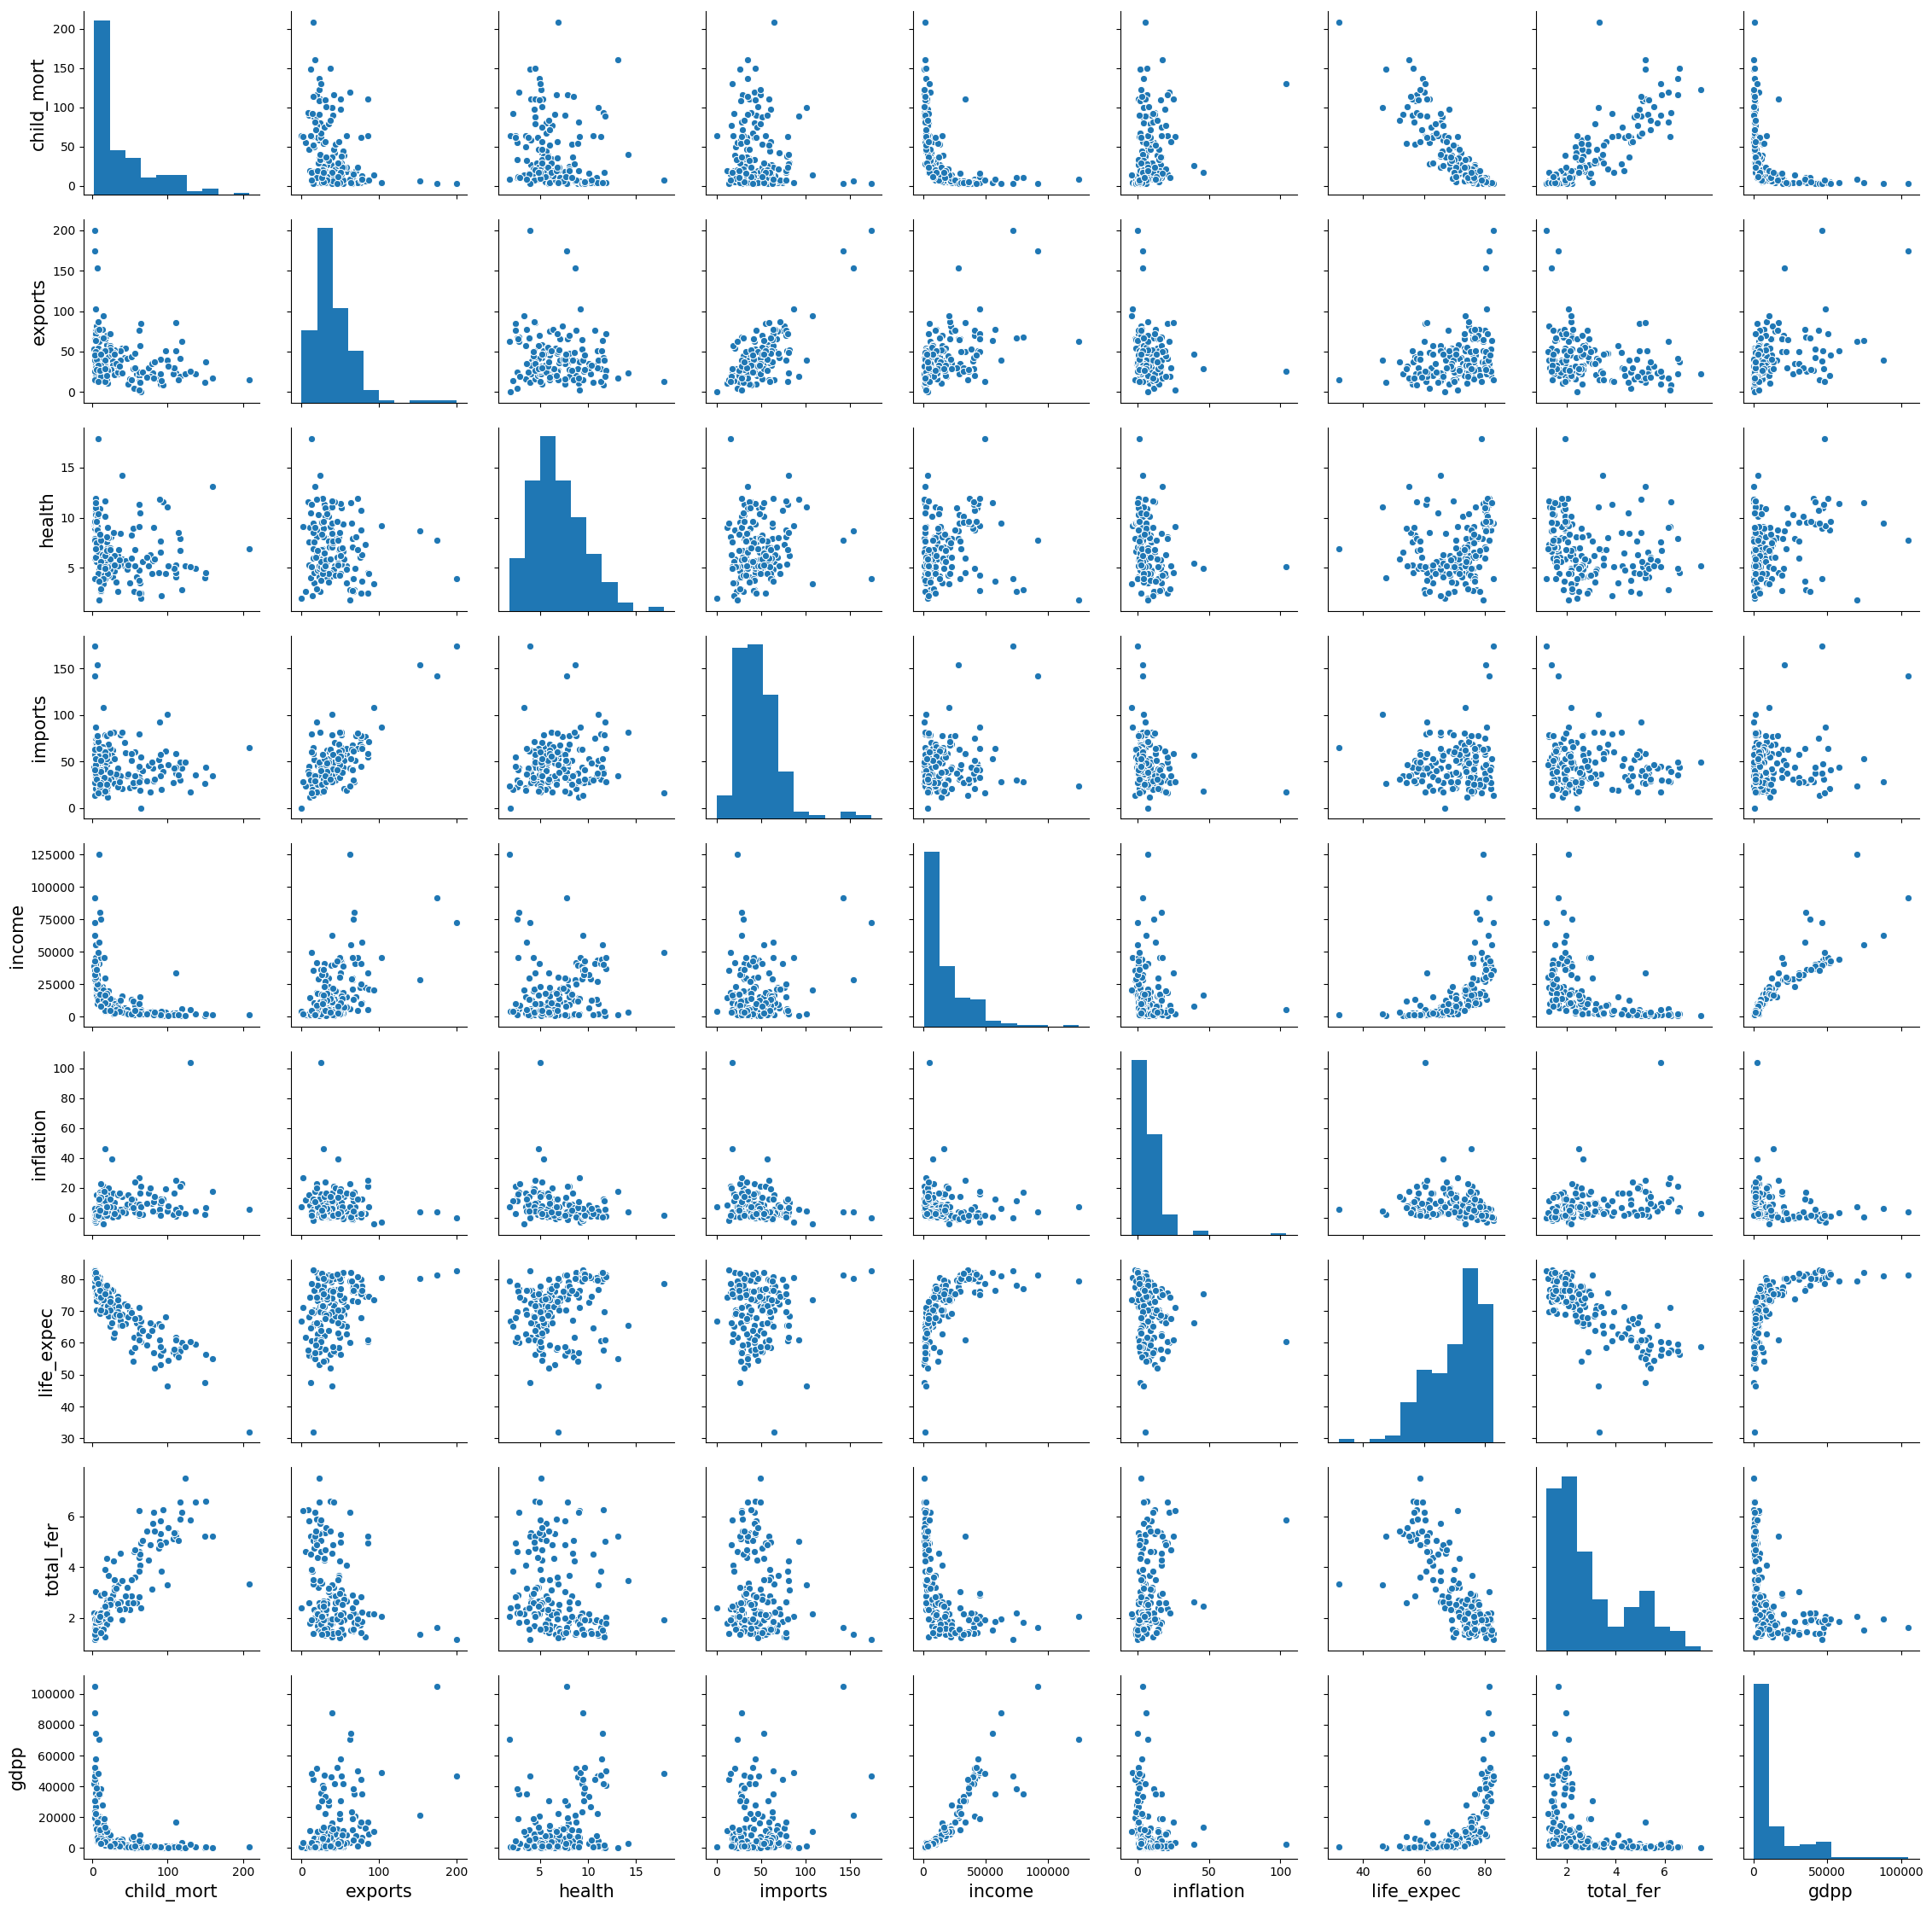

In [42]:
# pair plots for the features
sns.set_context(rc={"axes.labelsize":15}) # setting context with increased label size for better reading
#plt.rcdefaults() # resetting rc params to default
sns.pairplot(country)
plt.show()

In [43]:
# transforming income and gdpp to log scale
country_t = country.copy() # making a copy of original dataframe
country_t['log_income'] = np.log10(country_t['income'])
country_t['log_gdpp'] = np.log10(country_t['gdpp'])
country_t.drop(['income','gdpp'],axis = 1, inplace = True)

In [321]:
sns.set_context(rc={"axes.labelsize":15}) # setting context with increased label size for better view
#plt.rcdefaults() # resetting rc params to default
sns_plot  = sns.pairplot(country_t)
sns_plot.savefig('bva.jpg')

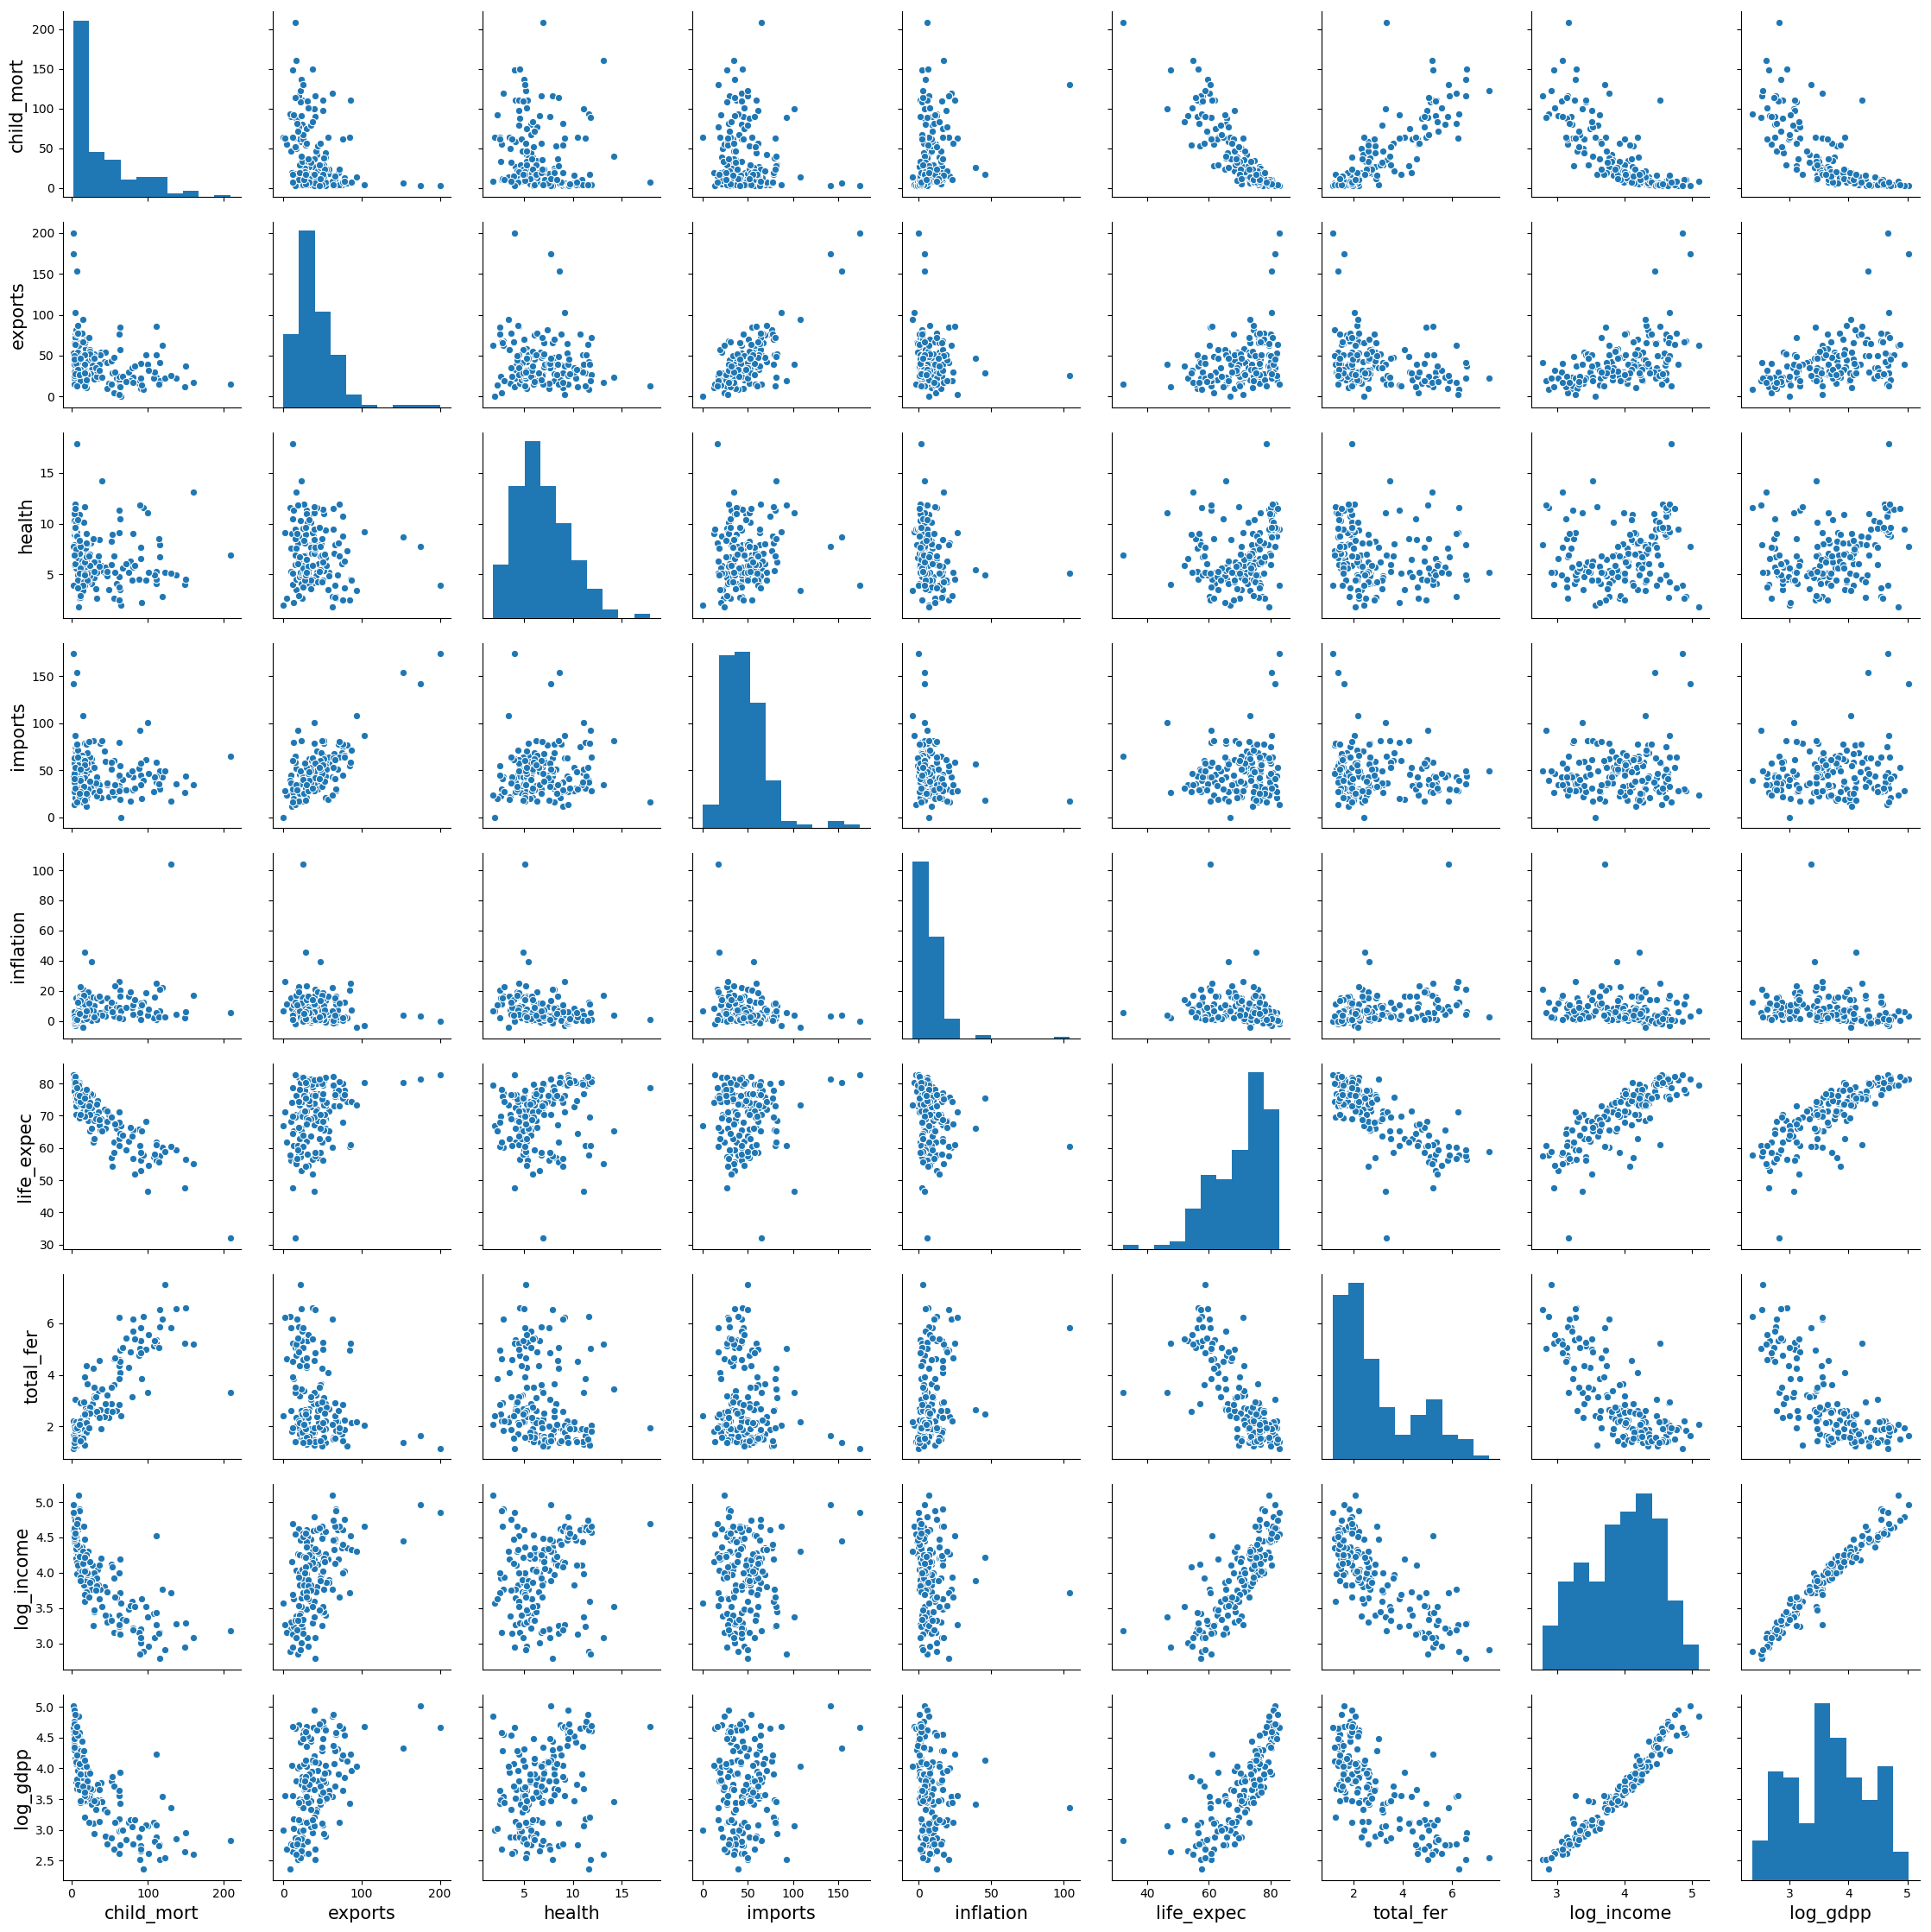

In [44]:
sns.set_context(rc={"axes.labelsize":15}) # setting context with increased label size for better view
#plt.rcdefaults() # resetting rc params to default
sns.pairplot(country_t)
plt.show()

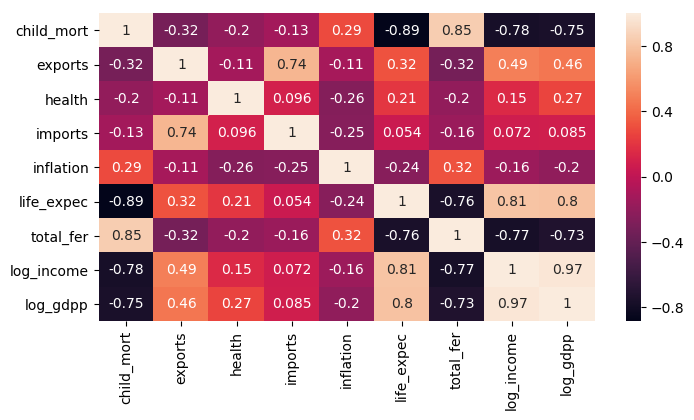

In [45]:
# correlation matrix 
plt.figure(figsize = (8,4))
sns.heatmap(country_t.corr(),annot = True)
plt.show()

from the above correlation matrix we can clearly see that there is high correlation between child mortality, income, gdpp, total fertility, and life expectancy.  

In [46]:
c_name = country_t['country'] # creating a copy og the country names
country_t_n = country_t.drop('country', axis = 1) # dropping the country names to create an matrix

In [47]:
# scaling the data set
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#standard_scaler = StandardScaler()
robust_scaler = RobustScaler(quantile_range = (25, 75))
#country_t_n_sca = standard_scaler.fit_transform(country_t_n)
country_t_n_sca = robust_scaler.fit_transform(country_t_n)

RobustScaler is used instead of StandardScaler because our dataset, being small, as some extreme outliers for some of the socio-economic factors. The RobustScaler will scale the data as per the IQR. In a previous version of the same code it was found that using StandardScaler impacted the final clusters due to extreme outliers.

## Outlier Treatment

Based on the results found in a previous version of the code, it was found that outlier treatment done after PCA impacted the final clusters. Also, the presence of outliers impacted the principal components as well. Hence, based on this and little research outlier treatment is being done before PCA.

In [48]:
# creating a dataframe of scaled matrix for outlier treatment
country_t_n_sca_df  = pd.DataFrame(country_t_n_sca)
country_t_n_sca_df.columns = ['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec',
       'total_fer', 'log_income', 'log_gdpp']

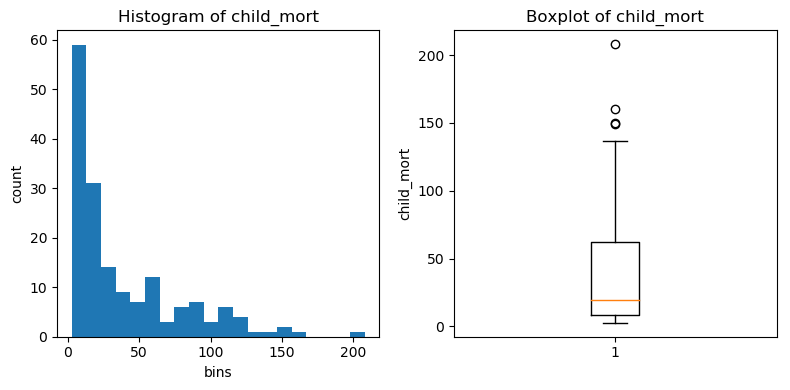

None


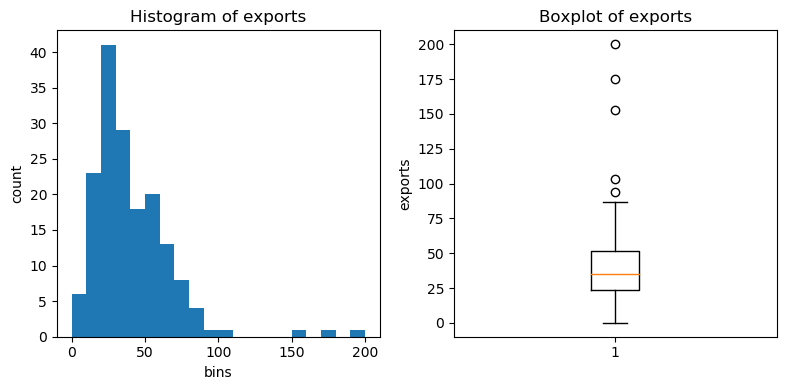

None


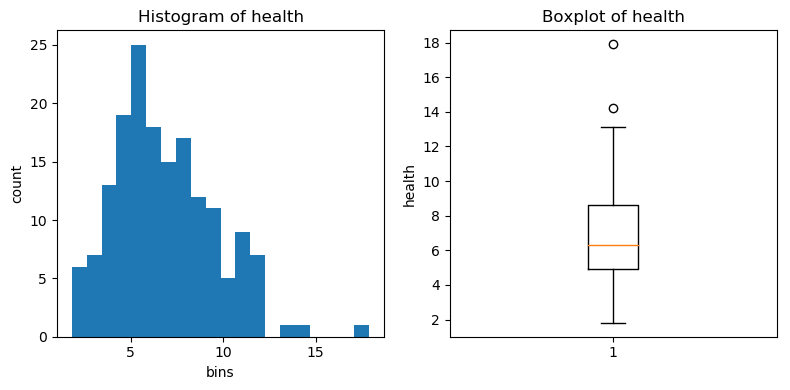

None


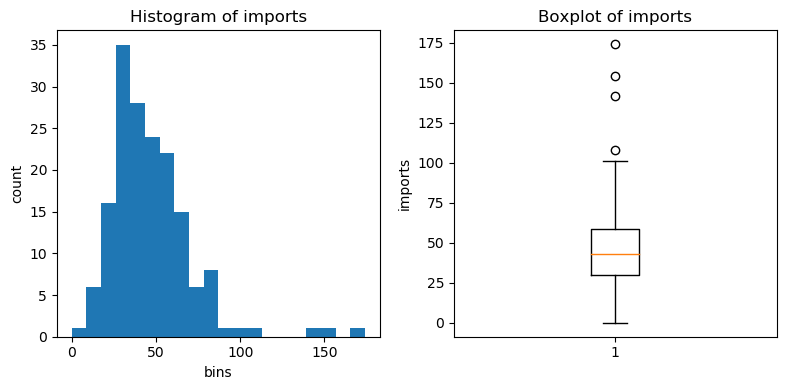

None


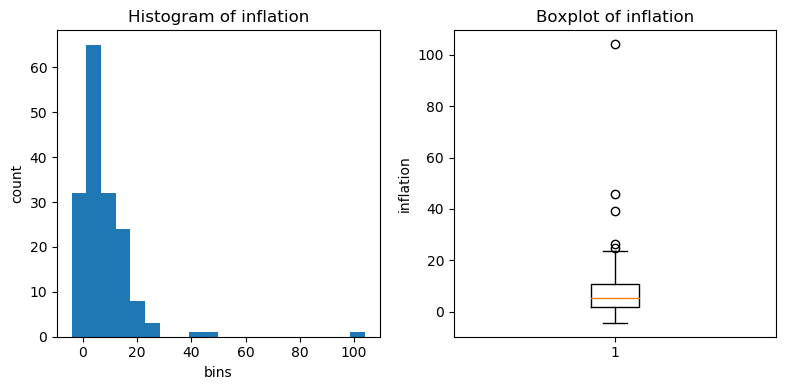

None


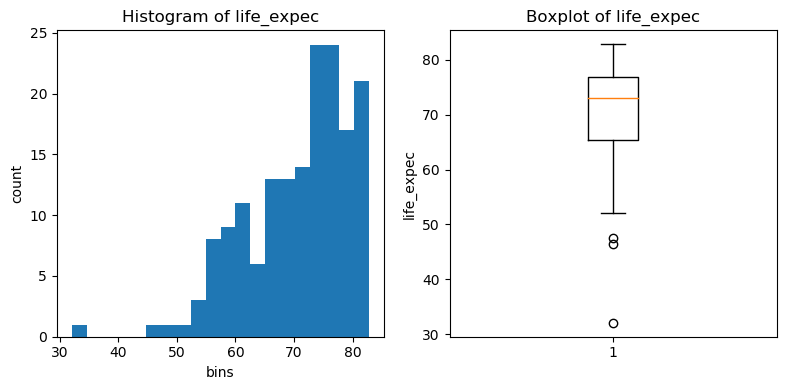

None


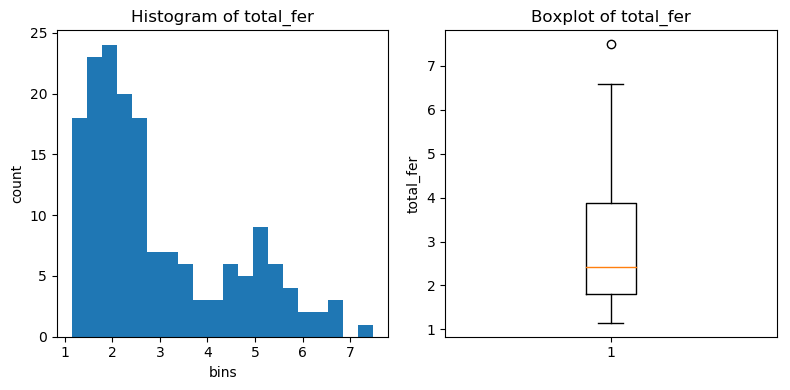

None


KeyError: 'log_income'

In [49]:
# extracting the column names and calling the function created earlier for plots
col_list = list(country_t_n_sca_df.columns)
for col in col_list:
    print(univariate_analysis(country[col], col))   

In [50]:
# creating a function for outlier treatment based on IQR method
def outlier_treatment(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    #outlier = df.loc[(df[col] <= Q1 - 1.5*IQR) | (df[col] >= Q3 + 1.5*IQR), 'country']
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    return(df)

In [51]:
# outlier treatment for child_mort
country_nooutlier = outlier_treatment(country_t_n_sca_df, 'child_mort')
print(country_nooutlier.shape)

(163, 9)


In [52]:
# outlier treatment for exports
country_nooutlier = outlier_treatment(country_nooutlier, 'exports')
print(country_nooutlier.shape)

(158, 9)


In [53]:
# outlier treatment for health
country_nooutlier = outlier_treatment(country_nooutlier, 'health')
print(country_nooutlier.shape)

(156, 9)


In [54]:
# outlier treatment for imports
country_nooutlier = outlier_treatment(country_nooutlier, 'imports')
print(country_nooutlier.shape)

(155, 9)


In [55]:
# outlier treatment for inflation
country_nooutlier = outlier_treatment(country_nooutlier, 'inflation')
print(country_nooutlier.shape)

(151, 9)


In [56]:
# outlier treatment for life_expec
country_nooutlier = outlier_treatment(country_nooutlier, 'life_expec')
print(country_nooutlier.shape)

(151, 9)


In [57]:
# outlier treatment for total_fer
country_nooutlier = outlier_treatment(country_nooutlier, 'total_fer')
print(country_nooutlier.shape)

(150, 9)


In [58]:
# outlier treatment for log_income
country_nooutlier = outlier_treatment(country_nooutlier, 'log_income')
print(country_nooutlier.shape)

(150, 9)


In [59]:
# outlier treatment for log_gdpp
country_nooutlier = outlier_treatment(country_nooutlier, 'log_gdpp')
print(country_nooutlier.shape)

(150, 9)


## Principal Component Analysis

In [61]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)

In [62]:
# doing pca on the dataset
pca.fit(country_nooutlier)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [63]:
pca.components_

array([[ 0.41277893, -0.20959899, -0.18560414, -0.05361264,  0.22758074,
        -0.44240775,  0.43619959, -0.39149423, -0.39661465],
       [ 0.01822115,  0.68169993, -0.49954314,  0.2703501 ,  0.42868947,
        -0.06555129,  0.0230354 ,  0.14157191,  0.06062834],
       [ 0.07515775,  0.31648835,  0.36958162,  0.68166728, -0.44834486,
        -0.15275619,  0.09807766, -0.20386108, -0.13190694],
       [ 0.10387824,  0.13569491,  0.7270776 , -0.05955813,  0.56601341,
        -0.05959492,  0.22876788,  0.14744621,  0.20151756],
       [-0.36611074, -0.27895385,  0.06266342,  0.38656255,  0.47962578,
         0.15261596, -0.40239787, -0.28302557, -0.37340371],
       [-0.04515403,  0.12753879,  0.11080686, -0.21124997, -0.03736291,
        -0.75738404, -0.58927343,  0.0490321 , -0.01078704],
       [-0.11726496, -0.50560006, -0.17726116,  0.47157582,  0.06548219,
        -0.35531965,  0.16988884,  0.34122159,  0.44830556],
       [ 0.81416543, -0.14726473, -0.01198673,  0.19627604,  0

In [64]:
colnames = list(country_t_n.columns)
pca_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pca_df

,Feature,PC1,PC2
0,child_mort,0.412779,0.018221
1,exports,-0.209599,0.681700
2,health,-0.185604,-0.499543
3,imports,-0.053613,0.270350
4,inflation,0.227581,0.428689
5,life_expec,-0.442408,-0.065551
6,total_fer,0.436200,0.023035
7,log_income,-0.391494,0.141572
8,log_gdpp,-0.396615,0.060628


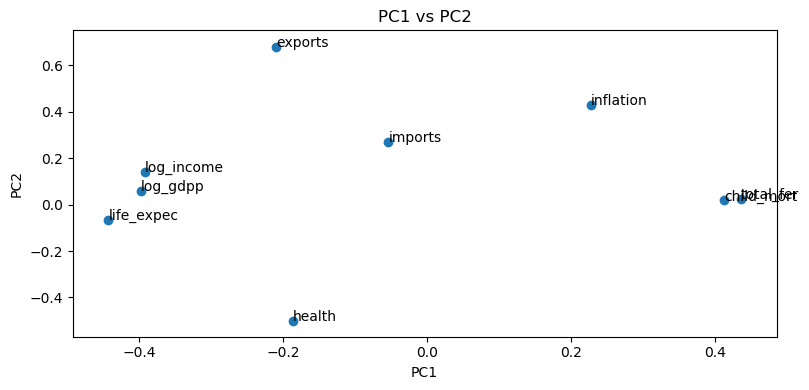

In [65]:
plt.rcdefaults()
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)
ax.set(title  = 'PC1 vs PC2', xlabel = 'PC1', ylabel = 'PC2')
plt.scatter(pca_df.PC1, pca_df.PC2)
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

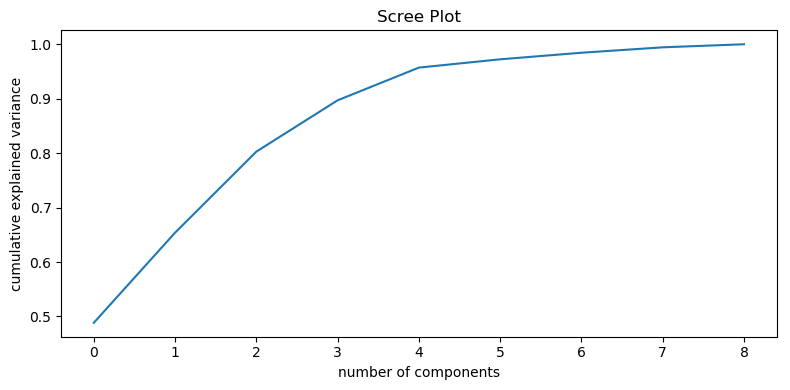

In [125]:
#Making the scree plot
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)
ax.set(title  = 'Scree Plot', xlabel = 'number of components', ylabel = 'cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.tight_layout()
plt.show()

__4 components are enough to describe around 95% of variance of data set__

In [66]:
# using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)

In [67]:
# basis transformation - getting data onto our PCs
country_pca = pca_final.fit_transform(country_nooutlier)
country_pca.shape

(150, 4)

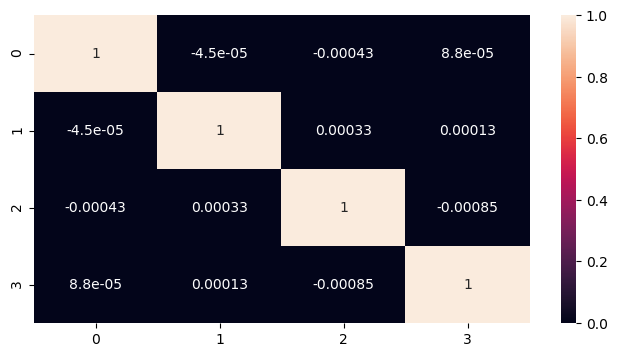

In [68]:
# seeing the correlation among principal components
plt.figure(figsize = (8,4))
sns.heatmap(np.corrcoef(country_pca.transpose()),annot = True)
plt.show()

In [69]:
# creating a dataframe out of the principam components and adding column names
country_pca = pd.DataFrame(country_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [70]:
country_pca.head()

,PC1,PC2,PC3,PC4
0,-2.586620,-0.763896,0.372602,0.376355
1,0.550085,-0.383411,-0.070467,-0.477132
2,-0.084962,0.632734,-1.139492,0.065202
3,-2.326810,1.916585,-0.414916,0.887192
4,1.038105,0.150752,0.365978,-0.502051


## Hopkins Statistic for clustering tendency

In [75]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [84]:
hopkins(country_pca)

0.7416244091922249

## Hierarchical Clustering

In [85]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

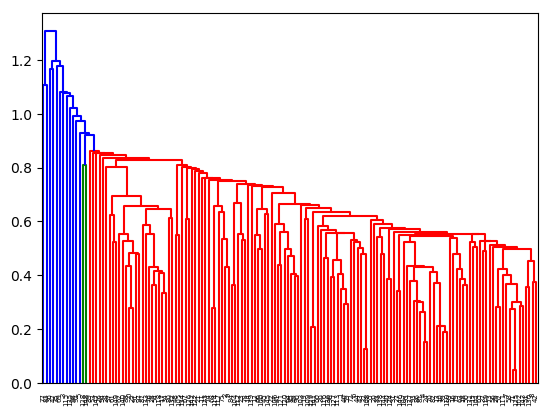

In [249]:
# hierarchical clustering with single linkage
mergings = linkage(country_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

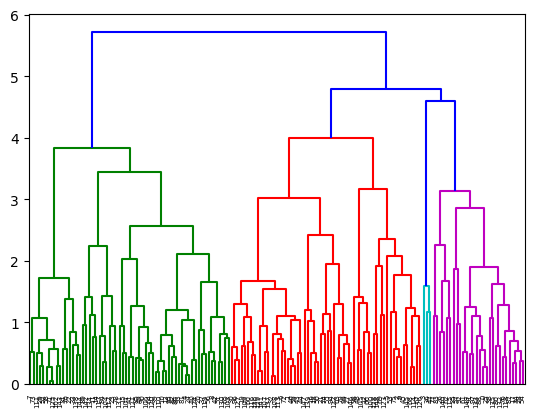

In [250]:
# hierarchical clustering with complete linkage
mergings = linkage(country_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [251]:
# cutting the dendogram 

clusterCut5 = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country_hc5 = pd.concat([country_pca, clusterCut5], axis=1)

clusterCut4 = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
country_hc4 = pd.concat([country_pca, clusterCut4], axis=1)

clusterCut6 = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
country_hc6 = pd.concat([country_pca, clusterCut6], axis=1)

In [252]:
country_hc5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']
country_hc4.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']
country_hc6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']

In [253]:
# number of countries in each cluster with 5 clusters
country_hc5.groupby('Cluster')['Cluster'].count()

Cluster
0    28
1    37
2    21
3     3
4    61
Name: Cluster, dtype: int64

In [254]:
# number of countries in each cluster with 4 clusters
country_hc4.groupby('Cluster')['Cluster'].count()

Cluster
0    28
1    58
2     3
3    61
Name: Cluster, dtype: int64

In [255]:
# number of countries in each cluster with 6 clusters
country_hc6.groupby('Cluster')['Cluster'].count()

Cluster
0    28
1    37
2    21
3     3
4    45
5    16
Name: Cluster, dtype: int64

#### Visualising the clusters

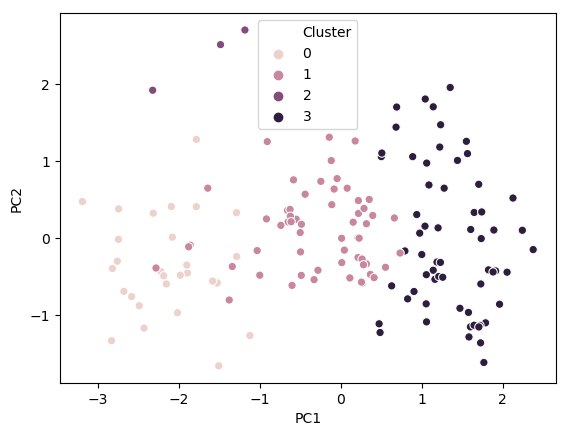

In [256]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = country_hc4)
plt.show()

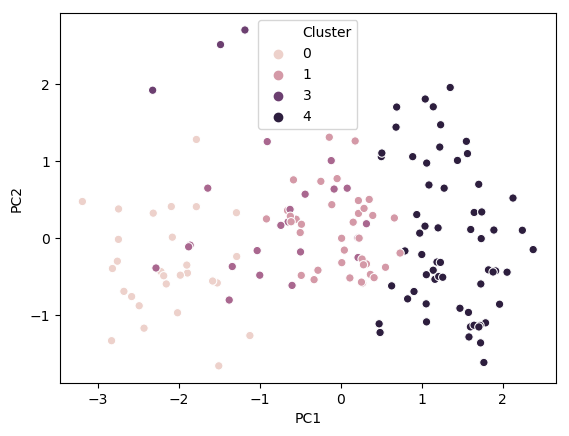

In [257]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = country_hc5)
plt.show()

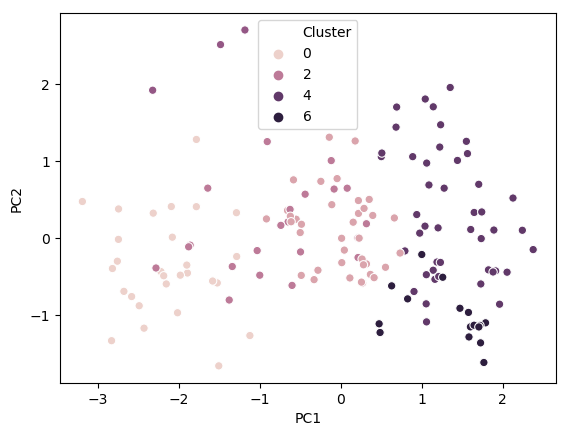

In [258]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = country_hc6)
plt.show()

__Going with 5 clusters__

In [259]:
# concatenating the clusters on the original data set
# this will be done based on row index so the outlier countries will have cluster value as NA
country_hc_final = pd.concat([country, clusterCut5], axis = 1)

In [260]:
# adding the columns
country_hc_final.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',  'gdpp', 'cluster']

In [261]:
country_hc_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4.0


In [262]:
# making seperate data frames for with cluster values and without cluster values
def seperate(df):
    country_hc_final_notnull = df.loc[df['cluster'].notnull()] # clustered countries
    country_hc_final_null = df.loc[df['cluster'].isnull()] # outlier countries
    return(country_hc_final_notnull, country_hc_final_null)

In [263]:
# storing the clustered and outlier countries
country_hc_final_notnull, country_hc_final_null = seperate(country_hc_final)

In [264]:
# finding the overall mean for all countries for all socio-econimic factors (excluding the outliers)

country_hc_final_notnull.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,38.768000,41.405327,6.799267,47.521106,17420.220000,7.484307,70.615333,2.937933,13213.340000,2.213333
std,41.459642,28.094779,2.680149,24.759450,19546.824475,10.495781,8.980835,1.526231,18690.471196,1.616138
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,7.650000,23.800000,4.845000,30.775000,3347.500000,1.747500,65.300000,1.762500,1320.000000,1.000000
50%,19.500000,35.200000,6.325000,43.300000,10700.000000,5.265000,73.250000,2.410000,5050.000000,2.000000
75%,62.200000,51.400000,8.710000,58.900000,23050.000000,9.717500,76.800000,3.847500,15650.000000,4.000000
max,208.000000,200.000000,14.200000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,4.000000


In [265]:
# function to generate boxplots and histograms for features
def cluster_mean(df1):
    df = df1.groupby('cluster', as_index = False).mean()
    # extracting the numeric column names and calling the function
    col_list = list(df.columns)
    for col in col_list:
        if col != 'cluster':
            plt.rcdefaults()    
            # Bar plot
            fig = plt.figure(figsize = (8,4))
            ax = fig.add_subplot(221)
            ax.set(title  = 'Barchart of '+col, xlabel = 'Cluster ID', ylabel = col)
            sns.barplot(x=df['cluster'], y=df[col])
            plt.tight_layout()
            plt.show()

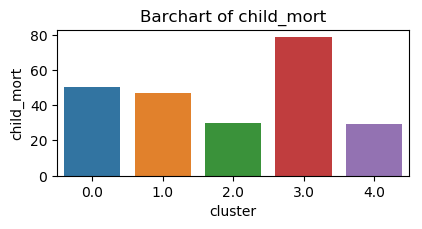

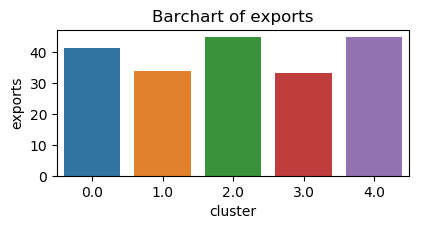

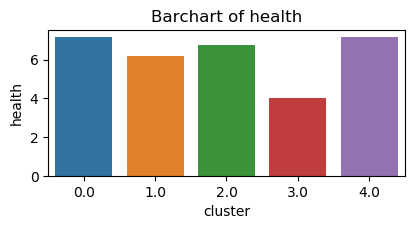

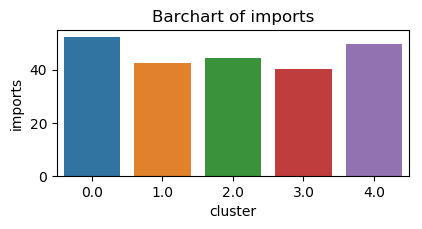

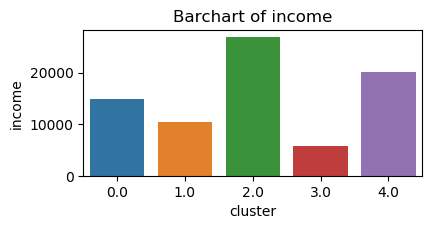

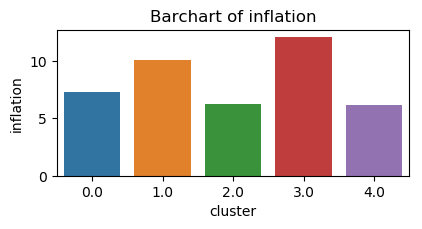

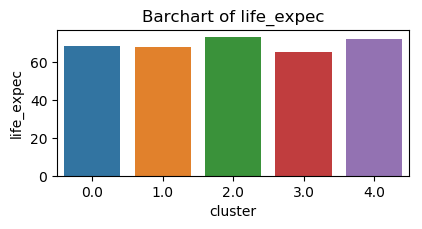

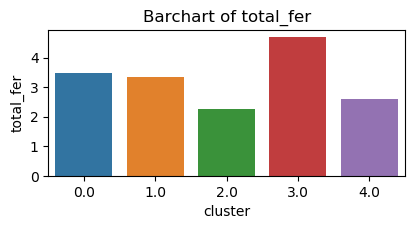

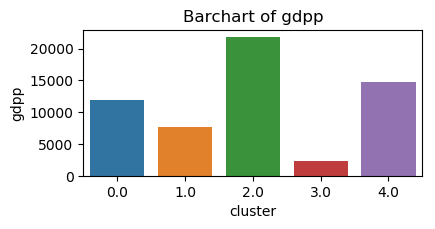

In [266]:
# mean analysis
cluster_mean(country_hc_final_notnull)

Since cluster number 3 has only 3 countries we will look at the next cluster with poor socio economic factors which is cluster number 2

In [267]:
# lets look at the countries in cluster 1
country_hc_final_notnull.loc[country_hc_final_notnull['cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,1.0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1.0
16,Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,1.0
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,1.0
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,1.0
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1.0
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,1.0
30,Cape Verde,26.5,32.700,4.09,61.8000,5830,0.505,72.5,2.67,3310,1.0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1.0
43,Czech Republic,3.4,66.000,7.88,62.9000,28300,-1.430,77.5,1.51,19800,1.0


## K-Means Clustering

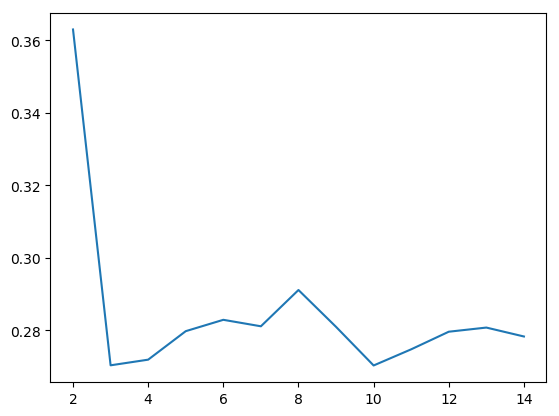

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_pca)
    sse_.append([k, silhouette_score(country_pca, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

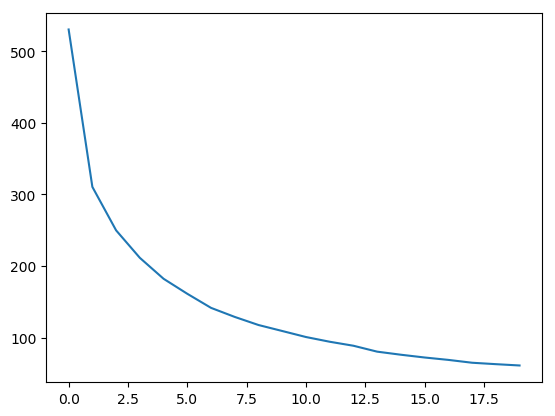

In [118]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

Based on the silhoutte analysis and elbow curve we go for 5 clusters.

In [284]:
# Kmeans with K=5
km_model_clus5 = KMeans(n_clusters = 5, max_iter=1000, n_init=100, init='k-means++')
km_model_clus5.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [299]:
# Kmeans with K=6
km_model_clus6 = KMeans(n_clusters = 6, max_iter=1000, n_init=100, init='k-means++')
km_model_clus6.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [301]:
# concatenating the clusters with the principal components
country_km5 = pd.concat([country_pca, pd.Series(km_model_clus5.labels_)], axis=1)

In [302]:
# concatenating the clusters with the principal components
country_km6 = pd.concat([country_pca, pd.Series(km_model_clus6.labels_)], axis=1)

In [303]:
# adding columns
country_km5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']
country_km6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']

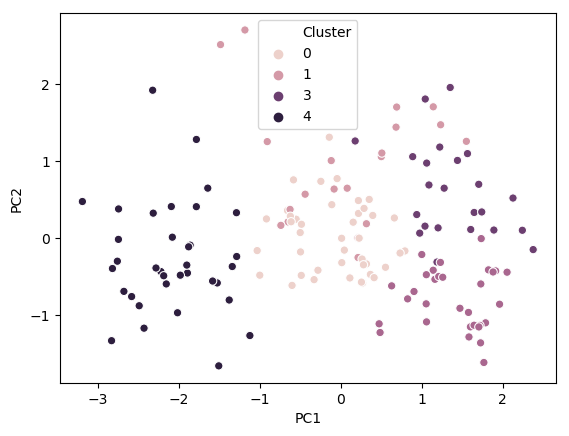

In [304]:
# visualising the clustering k=5
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = country_km5)
plt.show()

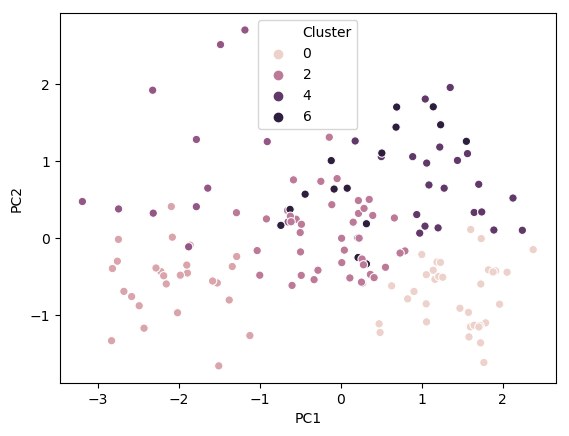

In [305]:
# visualising the clustering k=6
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = country_km6)
plt.show()

In [306]:
# concatenating the clusters with original data set
country_km5_final = pd.concat([country, pd.Series(km_model_clus5.labels_)], axis=1)
country_km6_final = pd.concat([country, pd.Series(km_model_clus6.labels_)], axis=1)

In [307]:
country_km5_final.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',  'gdpp', 'cluster']
country_km6_final.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',  'gdpp', 'cluster']

In [308]:
# number od countries in each cluster
country_km5_final.groupby('cluster')['country'].count()

cluster
0.0    41
1.0    20
2.0    31
3.0    23
4.0    35
Name: country, dtype: int64

In [309]:
# number od countries in each cluster
country_km6_final.groupby('cluster')['country'].count()

cluster
0.0    34
1.0    26
2.0    41
3.0    12
4.0    21
5.0    16
Name: country, dtype: int64

In [315]:
# storing the clustered and outlier countries
country_km5_final_clustered, country_km5_final_not_clustered = seperate(country_km5_final)
country_km6_final_clustered, country_km6_final_not_clustered = seperate(country_km6_final)

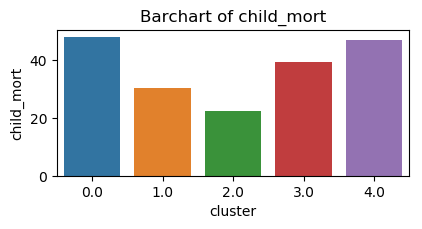

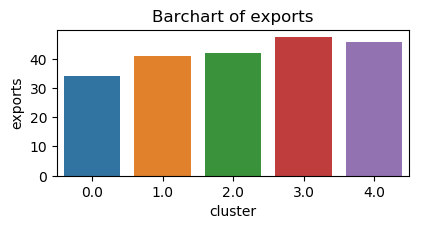

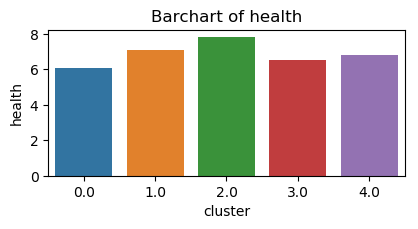

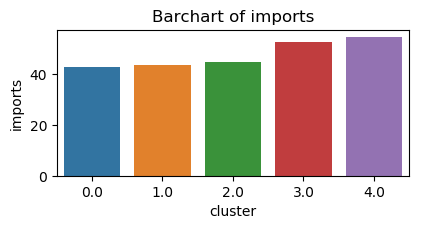

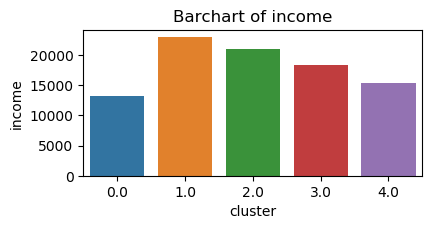

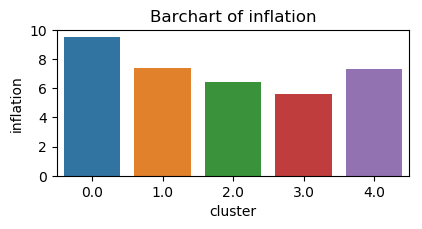

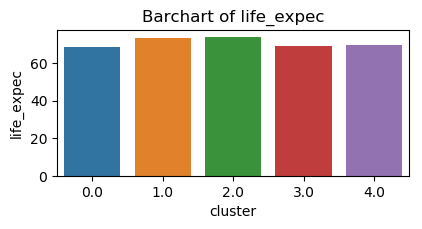

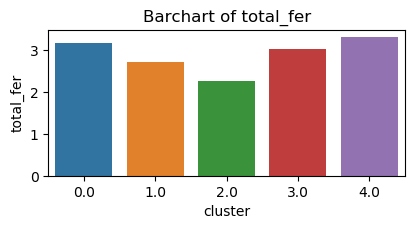

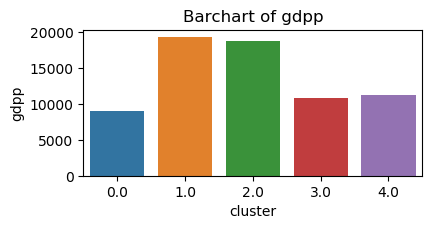

In [316]:
# mean analysis
cluster_mean(country_km5_final_clustered)

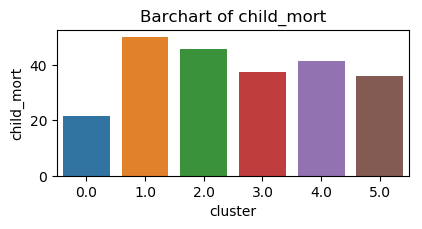

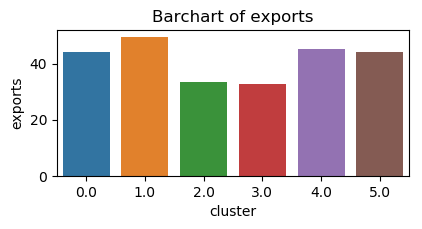

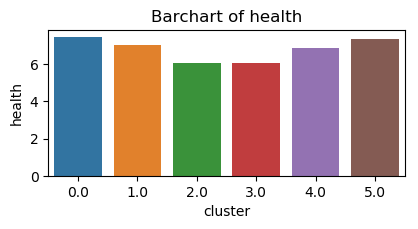

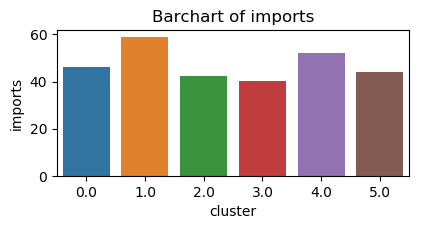

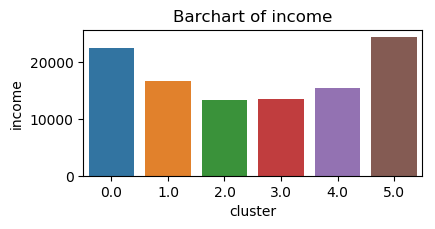

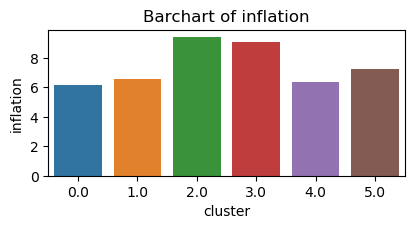

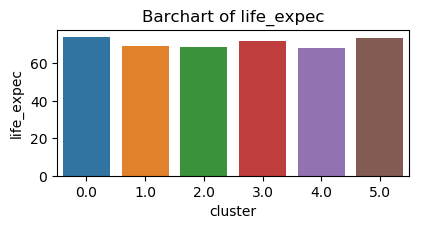

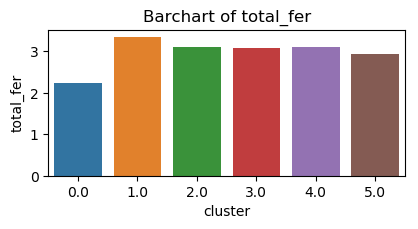

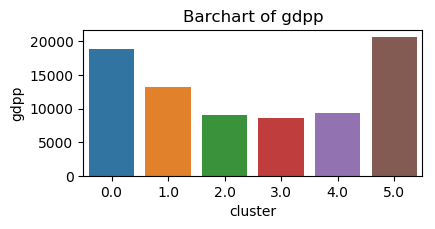

In [312]:
# mean analysis
cluster_mean(country_km6_final_clustered)

Going with 5 clusters as the difference is clusters is clear. We can see from the above plot that cluster 0 has high child mortality, low export, low health spending, low import, low income, high inflation and low gdpp. Thease are poor numbers for the socio economic factors.

In [318]:
# lets look at the countries in cluster 0
country_km5_final_clustered.loc[country_km5_final_clustered['cluster']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,0.0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,0.0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,0.0
16,Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,0.0
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,0.0
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,0.0
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,0.0
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,0.0
30,Cape Verde,26.5,32.700,4.09,61.8000,5830,0.505,72.5,2.67,3310,0.0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,0.0


In [294]:
country_km_final_clustered.loc[country_km_final_clustered['cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,48.007317,33.999488,6.043171,42.718680,13210.243902,9.512415,68.348780,3.170732,9024.146341,0.0
std,43.866396,17.102113,2.341422,17.542486,20639.883416,16.165756,9.907828,1.345118,15067.709405,0.0
min,3.400000,0.109000,1.810000,0.065900,1030.000000,-1.430000,32.100000,1.370000,459.000000,0.0
25%,18.100000,22.800000,4.470000,30.700000,2520.000000,2.880000,62.200000,2.230000,1000.000000,0.0
50%,42.700000,29.900000,5.680000,43.200000,6700.000000,6.390000,69.600000,2.710000,3450.000000,0.0
75%,63.700000,44.200000,7.630000,58.600000,13300.000000,11.600000,76.300000,4.240000,7280.000000,0.0
max,208.000000,77.600000,11.400000,81.200000,125000.000000,104.000000,81.900000,6.590000,70300.000000,0.0


In [295]:
country_km_final_clustered.loc[country_km_final_clustered['cluster']==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,30.475000,40.925000,7.069500,43.525000,22999.700000,7.363350,73.505000,2.725000,19327.000000,1.0
std,34.426594,19.926282,2.526132,19.068792,22325.048705,6.307782,6.930214,1.489378,25877.791997,0.0
min,2.600000,12.000000,2.840000,16.000000,814.000000,0.317000,58.800000,1.250000,348.000000,1.0
25%,5.250000,22.500000,4.622500,27.800000,8205.000000,2.495000,68.375000,1.822500,2287.500000,1.0
50%,17.100000,38.550000,7.685000,40.350000,15700.000000,5.710000,75.800000,2.285000,6355.000000,1.0
75%,44.100000,53.625000,9.182500,55.650000,36850.000000,11.025000,78.350000,3.160000,35425.000000,1.0
max,123.000000,81.800000,11.500000,78.200000,80600.000000,20.900000,82.200000,7.490000,87800.000000,1.0


In [296]:
country_km_final_clustered.loc[country_km_final_clustered['cluster']==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,22.432258,42.074194,7.817419,44.864516,20928.290323,6.419935,73.954839,2.271290,18763.290323,2.0
std,33.371199,20.680570,2.673033,19.535584,14733.518265,8.162560,7.933803,1.266827,18440.042788,0.0
min,3.000000,10.700000,2.610000,11.800000,609.000000,-3.220000,47.500000,1.230000,334.000000,2.0
25%,4.650000,29.150000,5.520000,29.500000,9075.000000,1.280000,69.800000,1.600000,4130.000000,2.0
50%,10.000000,39.200000,7.910000,43.700000,17400.000000,4.230000,76.000000,1.880000,10700.000000,2.0
75%,22.200000,50.750000,10.250000,57.100000,33100.000000,7.840000,80.250000,2.500000,32250.000000,2.0
max,149.000000,103.000000,11.900000,86.500000,45700.000000,39.200000,82.000000,6.540000,52100.000000,2.0


In [297]:
country_km_final_clustered.loc[country_km_final_clustered['cluster']==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,39.230435,47.43913,6.543043,52.500000,18361.652174,5.617565,69.186957,3.035217,10788.304348,3.0
std,39.985036,23.87522,2.781947,21.045276,17825.314356,6.746829,8.204783,1.569568,11544.418756,0.0
min,4.500000,13.30000,2.630000,17.200000,918.000000,-4.210000,54.500000,1.360000,413.000000,3.0
25%,8.200000,28.25000,4.725000,38.450000,3015.000000,1.480000,60.850000,1.580000,1485.000000,3.0
50%,14.400000,45.50000,6.030000,46.200000,18300.000000,3.530000,73.200000,2.210000,10800.000000,3.0
75%,67.300000,66.15000,7.610000,63.050000,23500.000000,8.215000,76.050000,4.740000,13050.000000,3.0
max,114.000000,93.80000,14.200000,108.000000,75200.000000,24.900000,80.000000,5.560000,44400.000000,3.0


In [298]:
country_km_final_clustered.loc[country_km_final_clustered['cluster']==4].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,46.848571,45.797714,6.797143,54.511429,15437.828571,7.347086,69.600000,3.313429,11305.085714,4.0
std,46.211250,45.118750,2.903339,37.245606,21024.069827,7.514094,9.397747,1.783549,20599.859320,0.0
min,2.800000,2.200000,2.460000,13.600000,700.000000,-1.900000,46.500000,1.150000,231.000000,4.0
25%,13.150000,20.150000,4.780000,33.300000,2430.000000,1.975000,60.600000,1.775000,1068.500000,4.0
50%,19.200000,26.900000,6.180000,43.000000,7290.000000,4.370000,73.400000,2.730000,3230.000000,4.0
75%,89.750000,53.350000,8.885000,59.450000,14700.000000,9.905000,75.600000,5.065000,7685.000000,4.0
max,160.000000,200.000000,13.100000,174.000000,91700.000000,26.500000,82.800000,6.550000,105000.000000,4.0
